In [0]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv

--2020-02-19 13:42:42--  https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10118 (9.9K) [text/plain]
Saving to: ‘auto-mpg.csv.8’

auto-mpg.csv.8      100%[===================>]   9.88K  --.-KB/s    in 0s      

2020-02-19 13:42:42 (159 MB/s) - ‘auto-mpg.csv.8’ saved [10118/10118]



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [0]:
df.isnull().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [0]:
df[(df.horsepower.isnull())]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74


In [0]:
df['acceleration'].value_counts()

14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acceleration, Length: 95, dtype: int64

In [0]:
df.dropna(inplace=True)

In [0]:
df['mpg'].value_counts().tail(74)

36.1    2
26.4    1
44.3    1
40.8    1
27.9    1
       ..
34.2    1
38.1    1
37.2    1
32.1    1
32.7    1
Name: mpg, Length: 74, dtype: int64

In [0]:
df = df.groupby('mpg').filter(lambda x : len(x) >3)

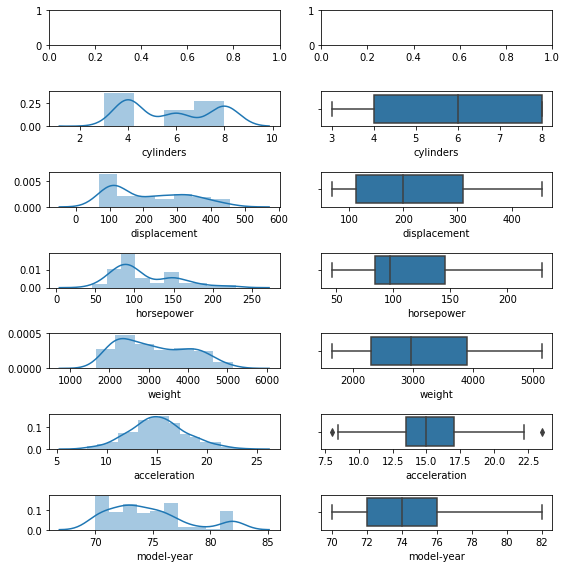

In [244]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 8))
for i, c in enumerate(df.columns):
    # print(c)
    if c == 'mpg':
        continue
    sns.distplot(df[c], ax=axes[i][0])
    sns.boxplot(x=c, data=df, ax=axes[i][1])
plt.tight_layout()

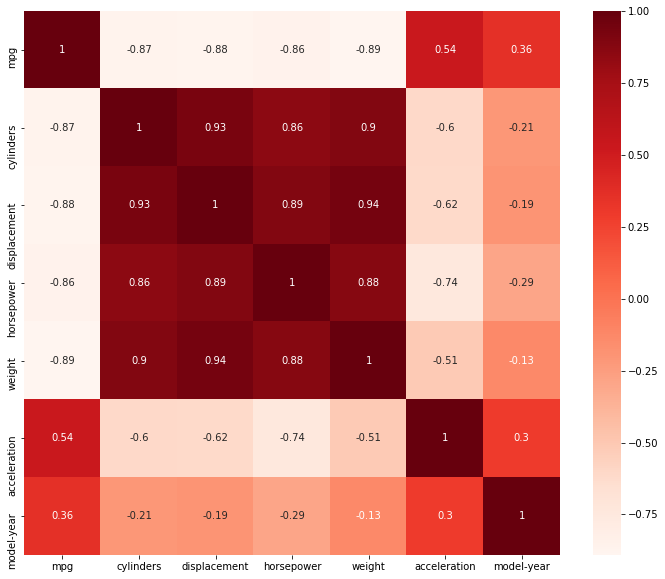

In [245]:
plt.figure(figsize=(12,10))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [246]:
#Correlation with output variable
cor_target = abs(cor["mpg"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

mpg             1.000000
cylinders       0.866943
displacement    0.875422
horsepower      0.860183
weight          0.890377
acceleration    0.535479
Name: mpg, dtype: float64

In [247]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    stratify=df['mpg'],
    random_state=42)

print(train_df.shape)
print(test_df.shape)

(204, 7)
(52, 7)


In [248]:
train_df['mpg'].value_counts()

13.0    16
14.0    15
18.0    13
15.0    13
26.0    11
16.0    10
19.0     9
24.0     9
22.0     8
25.0     8
23.0     8
28.0     8
27.0     7
20.0     7
31.0     6
17.0     6
21.0     6
29.0     6
30.0     6
36.0     5
12.0     5
32.0     5
15.5     4
17.5     4
38.0     3
11.0     3
20.2     3
Name: mpg, dtype: int64

In [249]:
test_df['mpg'].value_counts()

13.0    4
14.0    4
18.0    4
19.0    3
16.0    3
26.0    3
15.0    3
24.0    2
20.0    2
23.0    2
28.0    2
29.0    2
27.0    2
25.0    2
22.0    2
21.0    1
17.5    1
30.0    1
15.5    1
12.0    1
11.0    1
31.0    1
38.0    1
17.0    1
36.0    1
32.0    1
20.2    1
Name: mpg, dtype: int64

In [0]:
features = ['cylinders', 'displacement', 'horsepower', 'weight']

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_df = pd.DataFrame(
    scaler.fit_transform(train_df[features]), 
    index=train_df.index,
    columns=features)
scaled_train_df['mpg'] = train_df['mpg']

In [0]:
# fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 8))
# for i, c in enumerate(train_df.columns):
#     if c == 'cylinders':
#         continue
#     sns.violinplot(y='cylinders', x=c, data=train_df, ax=axes[i][0])
#     sns.violinplot(y='cylinders', x=c, data=scaled_train_df, ax=axes[i][1])
# plt.tight_layout()


In [0]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf = clf.fit(scaled_train_df[features], scaled_train_df['mpg'])

In [0]:
from sklearn.metrics import mean_squared_error

In [263]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(scaled_train_df[features])
mean_squared_error(train_df['mpg'], y_pred_train)
# accuracy_score(train_df['cylinders'], y_pred_train)

11.954714546715609

In [264]:
scaled_test_df = pd.DataFrame(
    scaler.transform(test_df[features]), 
    index=test_df.index,
    columns=features)

y_pred_test = clf.predict(scaled_test_df[features])
mean_squared_error(train_df['cylinders'], y_pred_train)
# accuracy_score(test_df['cylinders'], y_pred_test)

287.98705015916676